# Chapter 3: Cheminformatics Essentials - Interactive Notebook

This notebook demonstrates code and concepts from [Chapter 3: Cheminformatics Essentials](../chapters/chapter3-cheminformatics-essentials.qmd) of the book.

You can run and modify the code cells below to explore cheminformatics hands-on.

## Install and Import RDKit

We'll use RDKit for cheminformatics operations. If not installed, uncomment the pip command below.

In [1]:
# !pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Crippen

## Parse and Visualize Molecules

Let's parse a list of SMILES strings and visualize the molecules.

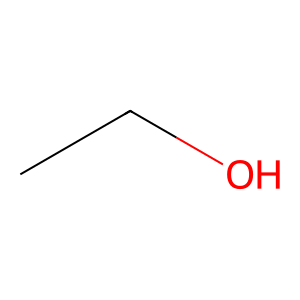

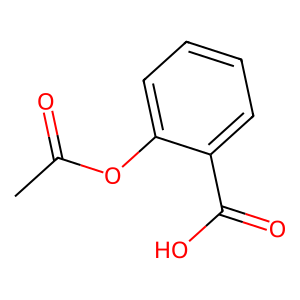

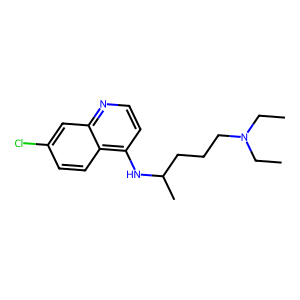

In [2]:
smiles_list = [
    "CCO",  # ethanol
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # aspirin
    "CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl"  # chlorpromazine
]

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        display(Draw.MolToImage(mol))
    else:
        print(f"Invalid SMILES: {smi}")

## Calculate Properties and Apply Lipinski's Rule of Five

Let's calculate molecular weight, LogP, and check Lipinski's Rule of Five for each molecule.

In [3]:
def lipinski(mol):
    mw = Descriptors.MolWt(mol)
    logp = Crippen.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return (mw < 500 and logp < 5 and hbd <= 5 and hba <= 10)

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol:
        mw = Descriptors.MolWt(mol)
        logp = Crippen.MolLogP(mol)
        hbd = Descriptors.NumHDonors(mol)
        hba = Descriptors.NumHAcceptors(mol)
        lip = lipinski(mol)
        print(f"SMILES: {smi}\tMW: {mw:.2f}\tLogP: {logp:.2f}\tHBD: {hbd}\tHBA: {hba}\tLipinski: {lip}")
    else:
        print(f"Invalid SMILES: {smi}")

SMILES: CCO	MW: 46.07	LogP: -0.00	HBD: 1	HBA: 1	Lipinski: True
SMILES: CC(=O)OC1=CC=CC=C1C(=O)O	MW: 180.16	LogP: 1.31	HBD: 1	HBA: 3	Lipinski: True
SMILES: CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl	MW: 319.88	LogP: 4.81	HBD: 1	HBA: 3	Lipinski: True


## Link to Book Chapter

For more details and explanations, see [Chapter 3: Cheminformatics Essentials](../chapters/chapter3-cheminformatics-essentials.qmd) in the book.